<a href="https://colab.research.google.com/github/Anjalee01/Python-For-AI/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Generate Synthetic Data 📊


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
study_hours = np.random.randint(1, 10, 50).astype(float)  # 20 students, 1-9 hours, cast to float
marks = 5 * study_hours + 10 + np.random.normal(0, 5, 50)  # y = 5x + 10 + noise

# Add outliers and missing values
marks[3] = 100  # Outlier
study_hours[5] = np.nan  # Missing value

# Create DataFrame
data = pd.DataFrame({'Study_Hours': study_hours, 'Marks': marks})
print("Raw Data:\n", data.head())

Raw Data:
    Study_Hours       Marks
0          7.0   42.766293
1          4.0   37.621208
2          8.0   51.614999
3          5.0  100.000000
4          7.0   34.108329


In [33]:
data.head()

,Study_Hours,Marks
0,7.0,42.766293
1,4.0,37.621208
2,8.0,51.614999
3,5.0,100.000000
4,7.0,34.108329


In [34]:
data.shape

(50, 2)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study_Hours  49 non-null     float64
 1   Marks        50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


In [36]:
data.size

100

In [37]:
data.describe()

,Study_Hours,Marks
count,49.000000,50.000000
mean,5.244898,37.409279
std,2.496085,16.969804
min,1.000000,5.621616
25%,3.000000,25.857686
50%,5.000000,36.030635
75%,7.000000,50.393438
max,9.000000,100.000000


# Step 2: Data Preprocessing 🧹
Handling Missing Values

Replace missing study hours with the mean.

In [38]:
# Fill missing values
data['Study_Hours'] = data['Study_Hours'].fillna(data['Study_Hours'].mean())
print("\nAfter Handling Missing Values:\n", data.head())


After Handling Missing Values:
    Study_Hours       Marks
0          7.0   42.766293
1          4.0   37.621208
2          8.0   51.614999
3          5.0  100.000000
4          7.0   34.108329


# Remove Outliers
Use IQR (Interquartile Range) to detect and remove outliers in marks.

In [39]:
# Detect outliers in Marks
Q1 = data['Marks'].quantile(0.25)
Q3 = data['Marks'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Feature Scaling (Normalization)
Scale study hours to [0, 1] range.

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your original DataFrame
clean_data = data.copy()  # Create a copy of the data to avoid modifying the original
scaler = MinMaxScaler()
clean_data['Study_Hours_Scaled'] = scaler.fit_transform(clean_data[['Study_Hours']])
print("\nAfter Scaling:\n", clean_data.head())


After Scaling:
    Study_Hours       Marks  Study_Hours_Scaled
0          7.0   42.766293               0.750
1          4.0   37.621208               0.375
2          8.0   51.614999               0.875
3          5.0  100.000000               0.500
4          7.0   34.108329               0.750


# Step 3: Exploratory Data Analysis (EDA) 🔍
Visualize Distributions

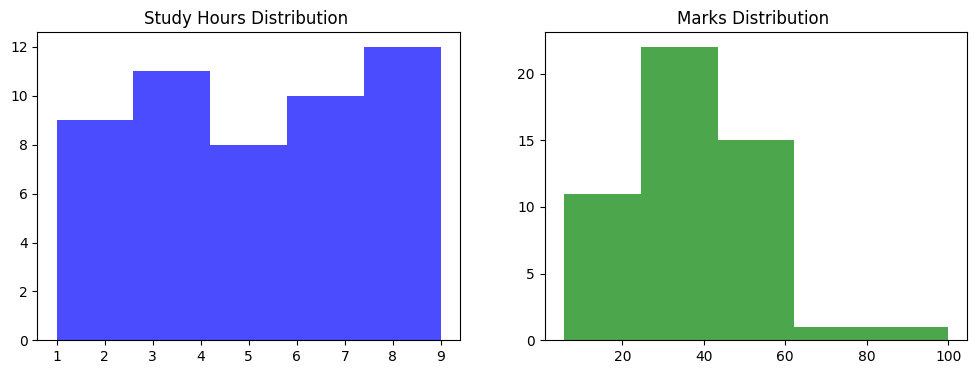

In [41]:
# Plot distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(clean_data['Study_Hours'], bins=5, color='blue', alpha=0.7)
plt.title("Study Hours Distribution ")

plt.subplot(1, 2, 2)
plt.hist(clean_data['Marks'], bins=5, color='green', alpha=0.7)
plt.title("Marks Distribution ")
plt.show()

# Scatter Plot (Relationship Between Variables)


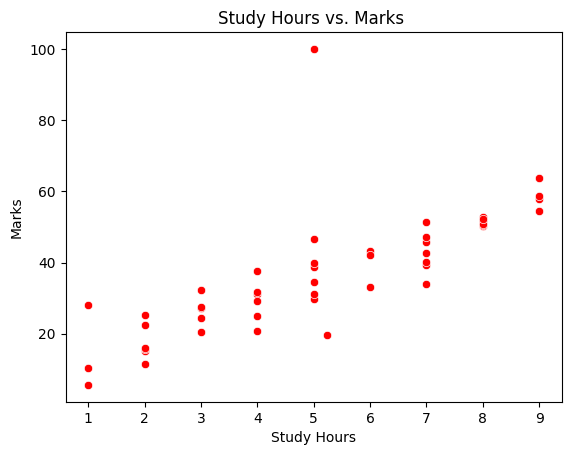

In [42]:
import seaborn as sns
sns.scatterplot(x='Study_Hours', y='Marks', data=clean_data, color='red')
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.title("Study Hours vs. Marks ")
plt.show()


# Step 4: Train Linear Regression Model 🤖
Math Behind the Model
Equation:

# y=mx+c

# m: Slope (coefficient)

# c: Intercept

In [43]:
# Extract X and y
X = clean_data['Study_Hours_Scaled'].values
y = clean_data['Marks'].values

In [44]:
# Manual calculation of slope (m) and intercept (c)
mean_x = np.mean(X)
mean_y = np.mean(y)

numerator = np.sum((X - mean_x) * (y - mean_y))
denominator = np.sum((X - mean_x) ** 2)
m = numerator / denominator  # Slope
c = mean_y - m * mean_x     # Intercept

print("\nEquation: Marks = {m:.2f} * Study_Hours + {c:.2f}")


Equation: Marks = {m:.2f} * Study_Hours + {c:.2f}


# Predict Marks


In [45]:
# Predict using y = mx + c
clean_data['Predicted_Marks'] = m * X + c



In [46]:
clean_data.head()

,Study_Hours,Marks,Study_Hours_Scaled,Predicted_Marks
0,7.0,42.766293,0.750,46.699155
1,4.0,37.621208,0.375,30.819949
2,8.0,51.614999,0.875,51.992224
3,5.0,100.000000,0.500,36.113018
4,7.0,34.108329,0.750,46.699155


In [47]:
# Y = mx + c
y_predict = m * 0.833333	+ c
print(y_predict)

50.22785368950633


In [48]:
x  = scaler.transform([[2]])
b = m * x + c
print(b)


[[20.23381102]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


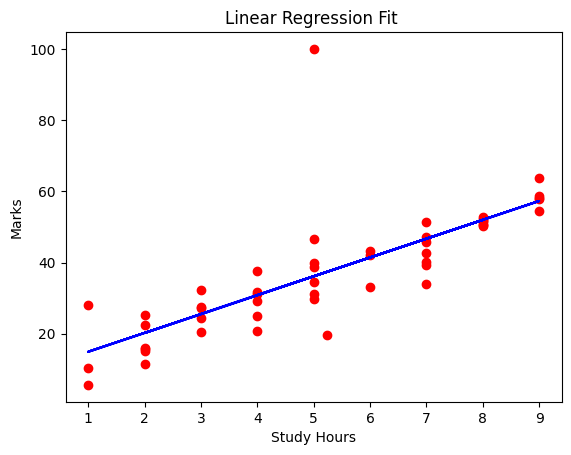

In [49]:
# Plot regression line
plt.scatter(clean_data['Study_Hours'], clean_data['Marks'], color='red')
plt.plot(clean_data['Study_Hours'], clean_data['Predicted_Marks'], color='blue')
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.title("Linear Regression Fit ")
plt.show()

# Step 5: Evaluate Model 📉


In [50]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, clean_data['Predicted_Marks'])
r2 = r2_score(y, clean_data['Predicted_Marks'])

print(f"\nMSE: {mse:.2f}")
print(f"R² Score: {r2:.2f} (1.0 = Perfect Fit)")


MSE: 114.64
R² Score: 0.59 (1.0 = Perfect Fit)


In [51]:
import joblib

# Save the model parameters
model_data = {'slope': m, 'intercept': c}
joblib.dump(model_data, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

# Train the model by using the sklearn library


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
dataset = clean_data.copy()

In [54]:
# 1. Create and train the model
model = LinearRegression()  # Create a LinearRegression object
X = dataset[['Study_Hours_Scaled']]  # Features (independent variable)
y = dataset['Marks']  # Target (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data
model.fit(X_train, y_train)  # Train the model on the training data

LinearRegression()

In [55]:
# 2. Make predictions
y_pred = model.predict(X_test)

In [56]:
s = model.predict([[0.83333333]])
s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49.88307835])

In [57]:
# our math code result
print(m * 1.000000 + c)

# sklearn model result
print(model.predict([[1.000000]]))


57.28529293008968
[56.85725451]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Cross-Validation
Cross-validation is a more robust evaluation strategy that divides the data into multiple folds, reducing variance in performance estimates caused by a single train-test split
Scikit-learn.[link text](https://)

In [58]:
from sklearn.model_selection import cross_val_score

# Assuming 'model' is your trained LinearRegression model
estimator = model  # Assign your model to the 'estimator' variable

# Perform 5-fold CV, scoring by accuracy
scores = cross_val_score(
    estimator, X, y,
    cv=5,
    scoring='r2'  # Use 'r2' for regression problems
)
print("CV Accuracy scores:", scores)
print("Mean CV Accuracy:", scores.mean())

CV Accuracy scores: [-0.04990114  0.85294204  0.89566183  0.89881812  0.76684857]
Mean CV Accuracy: 0.6728738840764026


In [59]:
from sklearn.metrics import get_scorer_names

# Now you can access the available scorers using:
scorers = get_scorer_names()
print(scorers)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_max_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples'

In [60]:
# 3. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 15.33
R-squared (R2): 0.89


In [61]:

# Print the model's coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")

Intercept: 15.01
Slope: 41.85


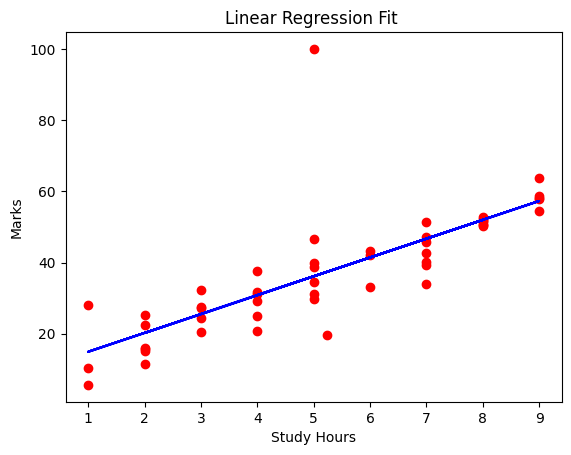

In [62]:
# Plot regression line
plt.scatter(dataset['Study_Hours'], dataset['Marks'], color='red')
plt.plot(dataset['Study_Hours'], dataset['Predicted_Marks'], color='blue')
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.title("Linear Regression Fit ")
plt.show()

# Explanation  📚
Data Generation: We created fake data to simulate real-world scenarios.

Preprocessing: Cleaned data by filling missing values, removing outliers, and scaling features.

EDA: Visualized data to understand patterns and relationships.

Math: Calculated slope (m) and intercept (c) using basic statistics.

Model: Plotted the regression line to see how well it fits the data.

Evaluation: Used MSE and R² to measure accuracy.